# Mini-Project: Advanced Statistical Analysis Of Apple Inc. Stock Data

In [2]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 1. Data Loading and Exploration

In [3]:
df_Apple = pd.read_csv('https://raw.githubusercontent.com/devtlv/MiniProject-DataAnalysis-W6D5-Apple_Stock_Data/main/AAPL%2C%201D%2001012007-12072023.csv')
df = df_Apple.copy()
df.tail()

,volume,vwap,open,close,high,low,time,transactions
4154,45155523.0,190.8214,189.84,191.8100,192.02,189.200,1688616000,562755
4155,46757498.0,191.4218,191.41,190.6800,192.67,190.240,1688702400,538826
4156,59912163.0,188.3628,189.26,188.6100,189.99,187.035,1688961600,736912
4157,46638119.0,187.8219,189.16,188.0800,189.30,186.600,1689048000,577717
4158,36423657.0,190.0251,189.68,190.0099,191.70,188.470,1689134400,500776


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


In [5]:
# cheching missings
df.isnull().sum()

volume          0
vwap            0
open            0
close           0
high            0
low             0
time            0
transactions    0
dtype: int64

In [6]:
# checking time series properties of the data
df['time'].unique()

array([1167800400, 1167886800, 1167973200, ..., 1688961600, 1689048000,
       1689134400], dtype=int64)

In [9]:
df['time'] = pd.to_datetime(df['time'], unit='s')

In [12]:
print(df['time'].min())
print(df['time'].max())
print(df['time'].count())

2007-01-03 05:00:00
2023-07-12 04:00:00
4159


In [32]:
# Calculate counts by year
counts_by_year = df.groupby(df['time'].dt.year).size().reset_index(name='Count')

# Calculate total count
total_count = counts_by_year['Count'].sum()

# Calculate percentage of total count
counts_by_year['Percentage'] = (counts_by_year['Count'] / total_count * 100).map('{:.0f}%'.format)

print(counts_by_year)

    time  Count Percentage
0   2007    251         6%
1   2008    253         6%
2   2009    252         6%
3   2010    252         6%
4   2011    252         6%
5   2012    250         6%
6   2013    252         6%
7   2014    252         6%
8   2015    252         6%
9   2016    252         6%
10  2017    251         6%
11  2018    251         6%
12  2019    252         6%
13  2020    253         6%
14  2021    252         6%
15  2022    251         6%
16  2023    131         3%


# 2. Data Visualization


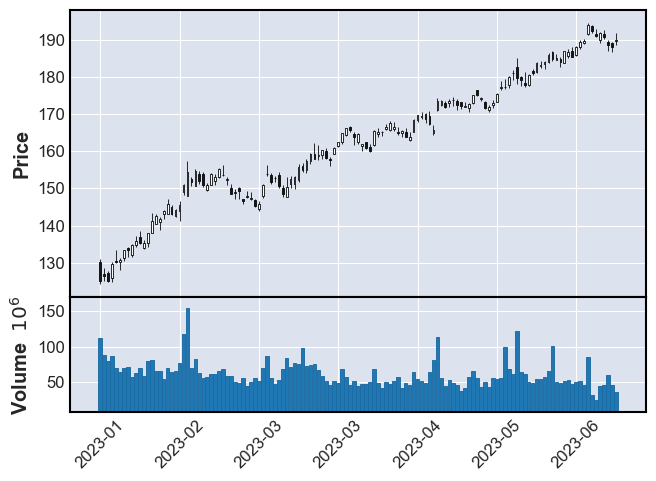

In [71]:
# creating a candlestick chart to depict prices and traded volume in 2023

import mplfinance as mpf
tdf = df.loc['2023-01-01 04:00:00':'2023-07-12 04:00:00', :]
mpf.plot(tdf,type='candle',mav=(200),volume=True, datetime_format='%Y-%m')

# 3. Statistical Analysis


In [67]:
# computing summary statistics (mean, median, standard deviation) for key columns

df.describe().T.map('{:.0f}'.format)

,count,mean,std,min,25%,50%,75%,max
volume,4159,366292450,372479281,24222338,106749696,213646276,496532070,3373042176
vwap,4159,46,50,3,12,26,52,193
open,4159,46,50,3,12,26,52,194
close,4159,46,50,3,12,26,52,194
high,4159,47,51,3,12,26,53,194
low,4159,46,50,3,12,26,52,192
transactions,4159,270932,251086,30487,112815,178246,325956,2966979


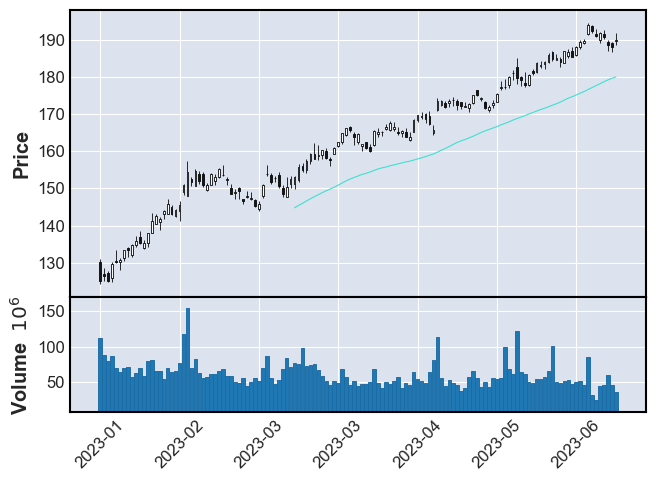

In [72]:
# Plotting the candlestick chart with a 50-day moving average
tdf = df.loc['2023-01-01 04:00:00':'2023-07-12 04:00:00', :]
mpf.plot(tdf,type='candle',mav=(50),volume=True, datetime_format='%Y-%m')

# 4. Hypothesis Testing

In [ ]:
# Executing a t-test to compare average closing prices across different years.

# 5. Advanced Statistical Techniques (Bonus)


# 6. Summary and Insights

# 7. Reflection